# Student Stress Level
Diambil dari Kaggle <a href = https://www.kaggle.com/datasets/poushal02/student-academic-stress-real-world-dataset>Link</a> <br>
Tujuan dataset ini memprediksi TINGKAT STRESS berdasarkan fitur-fitur yang ada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv(r"D:\BOOTCAMP\datasets\academic Stress level.csv")
data.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [3]:
data.columns

Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [5]:
data.shape

(140, 9)

<Axes: >

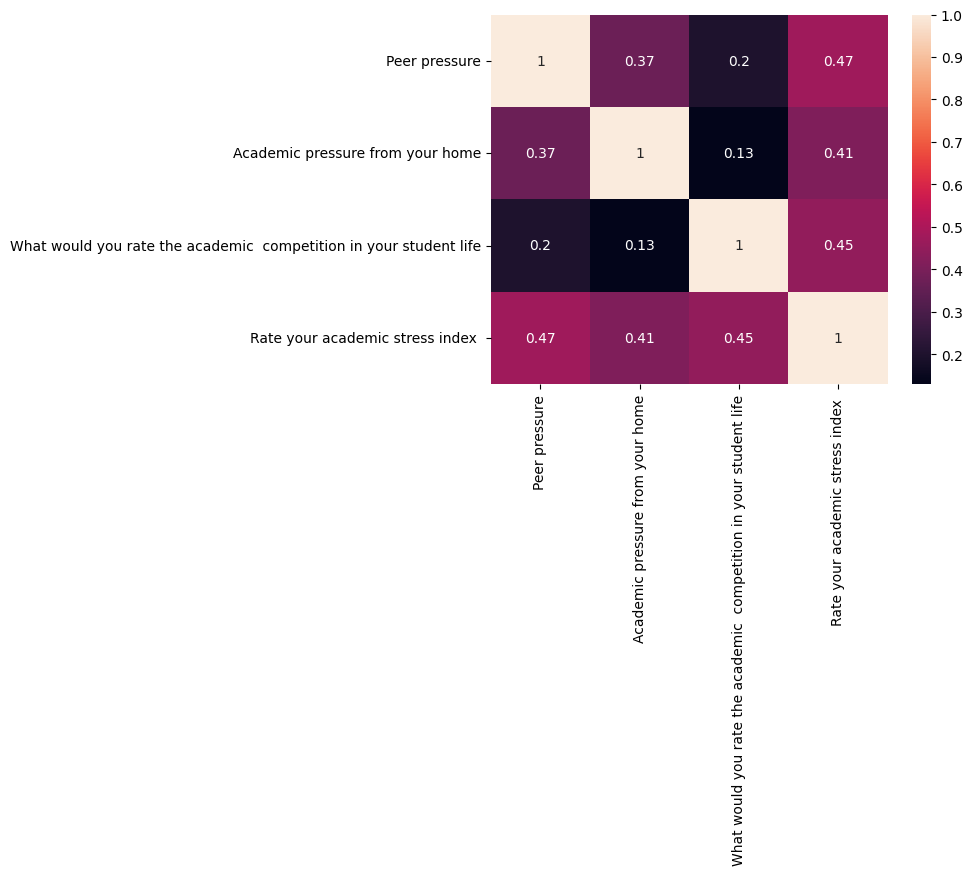

In [9]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [10]:
data.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [11]:
data.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

data.skew()

In [17]:
data.select_dtypes(include='number').skew()
#disini tidak ada yang skew (limit 0.75) so kita lanjutkan saja

Peer pressure                                                        -0.109149
Academic pressure from your home                                     -0.109292
What would you rate the academic  competition in your student life   -0.504026
Rate your academic stress index                                      -0.730882
dtype: float64

<Axes: xlabel='Study Environment', ylabel='count'>

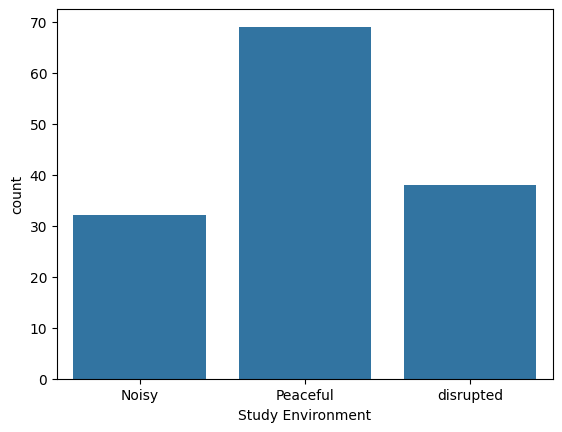

In [18]:
sns.countplot(data, x='Study Environment')

In [19]:
data['Study Environment'].value_counts()

Study Environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64

<Axes: xlabel='Rate your academic stress index ', ylabel='count'>

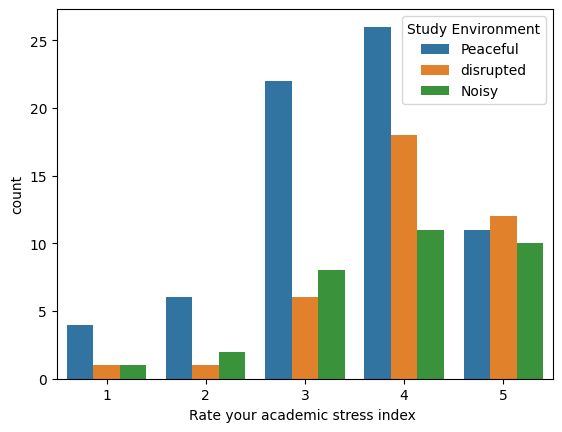

In [20]:
sns.countplot(data, x='Rate your academic stress index ', hue='Study Environment')
#Tingkat 1 = paling enjoy, tingkat 5= paling stress
#Dari grqfik, yang mempnegaruhi smekain stres adalah karena kondisi DISRUPTED nya pada Study Enviroment
#Tapi yang aneh kok PEACEFUL banyak pada indesx stress 4?

<Axes: xlabel='Study Environment', ylabel='Rate your academic stress index '>

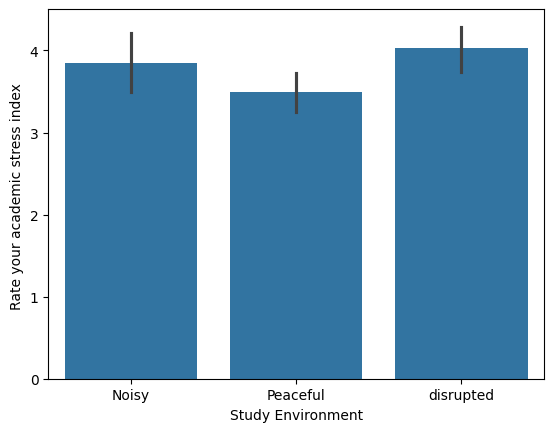

In [21]:
sns.barplot(data=data, x='Study Environment', y='Rate your academic stress index ', estimator=np.mean)

<Axes: xlabel='Rate your academic stress index ', ylabel='Academic pressure from your home'>

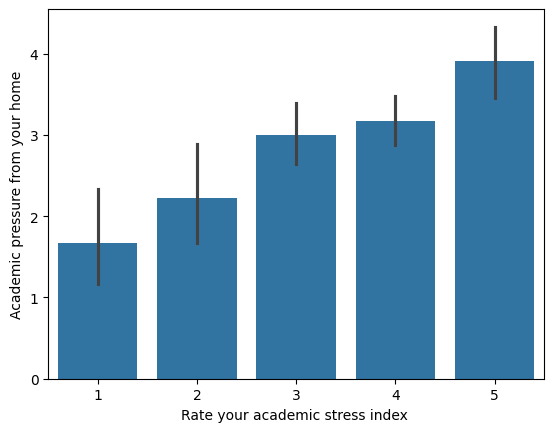

In [22]:
sns.barplot(data, y='Academic pressure from your home', x='Rate your academic stress index ', estimator=np.mean)
#oke, berarti preaddure dari rumah berbanding lurus dengan tingkat stress

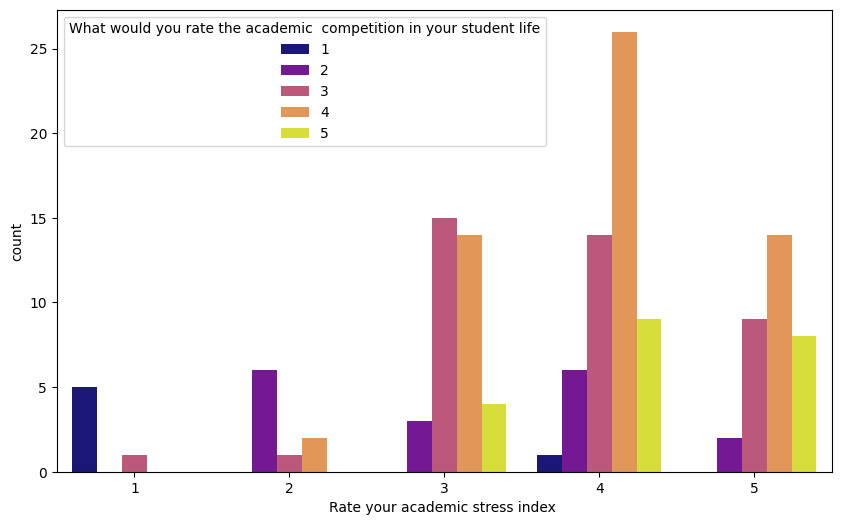

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data, x='Rate your academic stress index ', hue='What would you rate the academic  competition in your student life', palette='plasma')
plt.show()
#semuanya berbanding lurus. Dan nek ak lihat, tingkat stress 3-5, yang ada korelasi dengan tingkat kompetisi yg tinggi (tingkat 4)

<Axes: xlabel='Rate your academic stress index ', ylabel='count'>

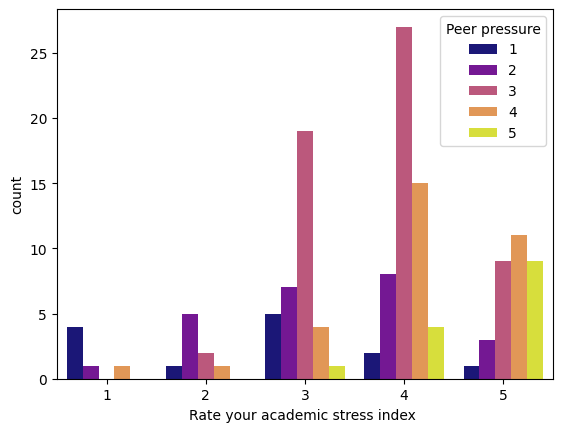

In [30]:
sns.countplot(data, hue='Peer pressure', x='Rate your academic stress index ', palette='plasma')

## Feature Engineering

In [31]:
data['Study Environment'].fillna('Peaceful', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15080\3153454013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Study Environment'].fillna('Peaceful', inplace=True)


In [32]:
data.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [33]:
data['Do you have any bad habits like smoking, drinking on a daily basis?'].value_counts()

Do you have any bad habits like smoking, drinking on a daily basis?
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64

In [34]:
data2 = data.copy()

In [35]:
data2 = data2.rename(columns={"Your Academic Stage":"Academic Stage"
                     , "Academic pressure from your home":"Home Pressure",
                     "What coping strategy you use as a student?":"Copying Strategy",
                     "Do you have any bad habits like smoking, drinking on a daily basis?":"Bad Habits",
                     "What would you rate the academic  competition in your student life":"Academic Competition Index",
                     "Rate your academic stress index ":"Stress Index"})
data2 = data2.drop(columns=['Timestamp','Academic Stage'],axis=1, inplace=False)


In [36]:
data2.head()

,Peer pressure,Home Pressure,Study Environment,Copying Strategy,Bad Habits,Academic Competition Index,Stress Index
0,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [37]:
data2['Copying Strategy'].value_counts()

Copying Strategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64

In [38]:
data2['Bad Habits'].value_counts()

Bad Habits
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64

In [39]:
no_count = data2['Bad Habits'].value_counts().get('No', 0)
yes_count = data2['Bad Habits'].value_counts().get('Yes', 0)
total = no_count + yes_count
print(no_count, yes_count, total)
print()

# Calculate proportions
no_prop = no_count / total if total > 0 else 0
yes_prop = yes_count / total if total > 0 else 0
print(no_prop, yes_prop)
# Find indices of 'prefer not to say'
prefer_idx = data2[data2['Bad Habits'] == 'prefer not to say'].index

# Number to assign to 'No' and 'Yes'
assign_no = int(len(prefer_idx) * no_prop)
assign_yes = len(prefer_idx) - assign_no

# Assign values
data2.loc[prefer_idx[:assign_no], 'Bad Habits'] = 'No'
data2.loc[prefer_idx[assign_no:], 'Bad Habits'] = 'Yes'

123 10 133

0.924812030075188 0.07518796992481203


In [40]:
data2['Bad Habits'].value_counts()

Bad Habits
No     129
Yes     11
Name: count, dtype: int64

In [42]:
col_to_encode = data2.select_dtypes('object').columns  # <- just the column names

oh = OneHotEncoder(sparse_output=False) #nek dalam param drop='first' maka akan emgnhilangkan kolom pertama dari hasil one hot encoding

one_hot_encoded = oh.fit_transform(data2[col_to_encode])

one_hot_df = pd.DataFrame(
    one_hot_encoded,
    columns=oh.get_feature_names_out(col_to_encode),
    index=data2.index
)

# Drop original categorical columns and join
data2 = pd.concat([data2.drop(col_to_encode, axis=1), one_hot_df], axis=1)


In [43]:
data2

,Peer pressure,Home Pressure,Academic Competition Index,Stress Index,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted,Copying Strategy_Analyze the situation and handle it with intellect,Copying Strategy_Emotional breakdown (crying a lot),"Copying Strategy_Social support (friends, family)",Bad Habits_No,Bad Habits_Yes
0,4,5,3,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3,4,3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1,2,4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,2,4,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,3,4,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,3,2,3,4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
136,4,2,3,3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
137,3,3,2,4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
138,4,5,5,5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Modelling

In [44]:
import sys
print(sys.executable)


d:\PROJECT ABAL\ML Envirom\.venv\Scripts\python.exe


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #untuk menentukan hypertuning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
# from imblearn import under_sampling, over_sampling
from collections import Counter

In [46]:
!{sys.executable} -m pip show pandas


'd:\PROJECT' is not recognized as an internal or external command,
operable program or batch file.


In [53]:
data_scaled = data2.copy()

In [68]:
# ...existing code...
x_to_scaled = data_scaled.drop(columns= 'Stress Index', axis=1)
y_to_scaled = data_scaled['Stress Index']
x = data2.drop(columns= 'Stress Index', axis=1)
y = data2['Stress Index']

x, y = make_classification(n_classes=5,class_sep=5,weights=[0.1,0.3,0.5,0.7,0.9],n_samples=1000, n_features=20, n_informative=5, n_redundant=10, random_state=42)
x_to_scaled, y_to_scaled = make_classification(n_classes=5,class_sep=5,weights=[0.1,0.3,0.5,0.7,0.9],n_samples=1000, n_features=20, n_informative=5, n_redundant=10, random_state=42)

# Subtract 1 so labels start from 0
# y = y - 1
# y_to_scaled = y_to_scaled - 1

# ...existing code...
xtest_toscaled, xtrain_toscaled, ytest_toscaled, ytrain_toscaled = train_test_split(x_to_scaled, y_to_scaled, test_size=0.2, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# ...existing code...

In [72]:
print(pd.Series(ytrain_toscaled).value_counts(normalize=True))
print()
print(pd.Series(ytrain).value_counts(normalize=True))

3    0.350
2    0.255
1    0.185
4    0.155
0    0.055
Name: proportion, dtype: float64

3    0.34625
2    0.24500
4    0.21375
1    0.14125
0    0.05375
Name: proportion, dtype: float64


In [ ]:
# xtest_toscaled, xtrain_toscaled, ytest_toscaled, ytrain_toscaled = train_test_split(x_to_scaled, y_to_scaled, test_size=0.2, random_state=42)
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
#normalisasi hanya digunakan untuk model yang yang berbasis gradient, pola, distance (SVM,KNN, Regression)
scaler = StandardScaler()
scaler.fit(xtrain_toscaled)
xtrain_toscaled = scaler.transform(xtrain_toscaled)
xtest_toscaled = scaler.transform(xtest_toscaled)

In [74]:
models_scaled = {"LR": LogisticRegression(),
          "SVC": SVC(),
          "KNN":KNeighborsClassifier()

          }
models = {"RFC":RandomForestClassifier(),
          "GBC": GradientBoostingClassifier(),
          "XGB": XGBClassifier()}

# Define parameter grids
param_scaling_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "LR": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    }}

params_grid ={
    "RFC": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "GBC": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "XGB": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
        "min_child_weight": [1, 3],
        "gamma": [0, 0.1],
        "reg_alpha": [0, 0.1],
        "reg_lambda": [1, 2]
    }
}

# Loop through models and hypertune
best_models = {}

In [78]:
for name, model in models_scaled.items():
    print(f"Hypertuning {name}...")
    grid = GridSearchCV(estimator=model, param_grid=param_scaling_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(xtrain_toscaled, ytrain_toscaled)
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.4f}")
    print()
    best_models[name] = grid.best_estimator_
    
    
# Evaluate best models on test set
for name, model in best_models.items():
    y_pred_toscaled = model.predict(xtest_toscaled)
    acc = accuracy_score(ytest_toscaled, y_pred_toscaled)
    print(f"✅ {name} test accuracy: {acc:.4f}")
    

Hypertuning LR...
Best parameters for LR: {'C': 0.1, 'solver': 'lbfgs'}
Best CV accuracy: 0.9900

Hypertuning SVC...
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV accuracy: 0.9900

Hypertuning KNN...
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Best CV accuracy: 0.9900

✅ LR test accuracy: 0.9862
✅ SVC test accuracy: 0.9888
✅ KNN test accuracy: 0.9888
✅ RFC test accuracy: 0.4637
✅ GBC test accuracy: 0.4587
✅ XGB test accuracy: 0.4412


In [76]:
# ...existing code...
y = data2['Stress Index'] - 1
y_to_scaled = data_scaled['Stress Index'] - 1
# ...existing code...

for name, model in models.items():
    print(f"Hypertuning {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=params_grid[name],  # fixed variable name here
        cv=3,
        n_jobs=-1,
        scoring="accuracy"
    )
    grid.fit(xtrain, ytrain)
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.4f}")
    print()
    best_models[name] = grid.best_estimator_

# Evaluate on test set
for name, model in best_models.items():
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    print(f"✅ {name} test accuracy: {acc:.4f}")

Hypertuning RFC...
Best parameters for RFC: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV accuracy: 0.9887

Hypertuning GBC...
Best parameters for GBC: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV accuracy: 0.9825

Hypertuning XGB...
Best parameters for XGB: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Best CV accuracy: 0.9875

✅ LR test accuracy: 0.9900
✅ SVC test accuracy: 0.9900
✅ KNN test accuracy: 0.9800
✅ RFC test accuracy: 0.9900
✅ GBC test accuracy: 0.9700
✅ XGB test accuracy: 0.9850


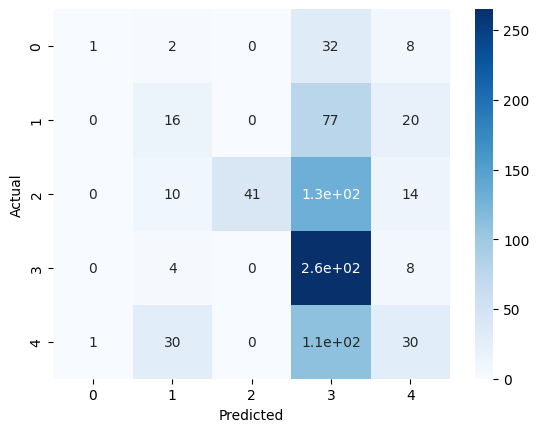

In [81]:
cm = confusion_matrix(ytest_toscaled, y_pred_toscaled)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

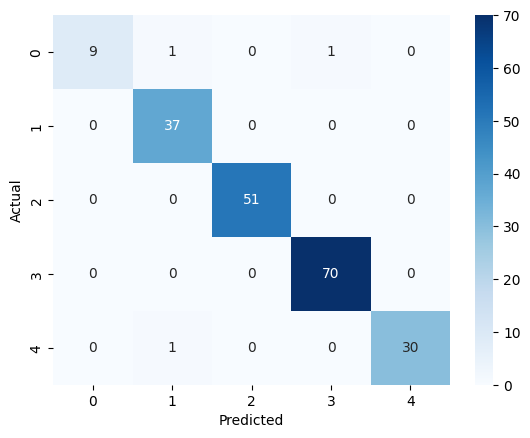

In [82]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#disini lebih kelihatan bersih, hasil predicted JAUH LEBIH bagus daripada tanpa scaling

In [ ]:
# Assuming you have trained RFC and have xtest
y_pred_rfc = best_models["RFC"].predict(xtest) +1 #karena label aslinya dari 1-5
print(y_pred_rfc)

[4 5 3 5 4 4 3 4 3 3 4 3 4 4 4 3 2 4 4 3 2 3 3 2 4 4 3 5 2 5 4 1 4 4 4 3 4
 4 1 4 1 4 4 5 2 5 3 4 3 2 2 3 2 4 2 4 4 4 3 4 3 2 1 5 2 3 2 4 4 5 4 4 4 2
 3 4 4 5 4 5 3 4 3 5 4 1 4 2 4 5 4 4 5 4 3 2 5 2 4 4 3 5 4 4 2 5 5 4 3 4 3
 2 3 3 2 1 4 2 4 5 3 3 2 4 2 4 5 3 3 5 4 4 2 3 2 3 2 2 3 4 3 3 4 5 2 3 2 3
 3 3 4 3 5 5 2 2 4 2 1 3 3 2 4 5 5 3 1 4 3 4 5 3 5 4 3 2 5 5 3 5 4 2 4 3 4
 4 2 4 1 2 5 3 3 3 4 4 2 4 4 2]


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest, y_pred_rfc))
print(classification_report(ytest, y_pred_rfc))


[[ 9  1  0  1  0]
 [ 0 37  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 70  0]
 [ 0  0  0  0 31]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        51
           3       0.99      1.00      0.99        70
           4       1.00      1.00      1.00        31

    accuracy                           0.99       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.99      0.99       200



In [105]:
import numpy as np

sample = np.array([[5, 4, 1,5, 5, 2, 5, 5, 1, 3, 2, 4,0,4,2,0,1,0,1,1]])  # just random 1–5s
prediction = best_models["RFC"].predict(sample)
prediction_adjusted = prediction + 1
print(prediction_adjusted)


[2]


In [91]:
import numpy as np
import pandas as pd

# Get feature names from xtest
feature_names = xtest.columns if isinstance(xtest, pd.DataFrame) else [f"f{i}" for i in range(xtest.shape[1])]

# Generate a random example (1 row, same number of features)
random_example = np.random.rand(1, xtest.shape[1])

# If your model expects a DataFrame, convert it
random_example_df = pd.DataFrame(random_example, columns=feature_names)

# Predict using RFC
predicted_stress = best_models["RFC"].predict(random_example_df)
print("Predicted Stress Index:", predicted_stress[0])

Predicted Stress Index: 1


d:\PROJECT ABAL\ML Envirom\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
